# Practical 0
## Part II. Exploring data with Pandas

Before we start building models using machine learning libraries such as Scikit-learn or Tensorflow, we might always need to explore and clean the data. 

In Part II of the worksheet, we will use Pandas to explore an example dataset - Titanic Disaster data, taken from [Kaggle Competition](https://www.kaggle.com/c/titanic/overview), for predicting the likelihood for a person to survive given some ticket information.


In this practical, we will guide you through the use of this package - but in the future we do expect you to make use of the package's documentation. This can be found here:
https://pandas.pydata.org/pandas-docs/stable/



### Hello Pandas
Pandas is a Python library that contains high-level data structures and manipulation tools designed for data analysis. Think of Pandas as a Python version of Excel. Scikit-learn, on the other hand, is an open-source machine learning library for Python. While Scikit-learn does a lot of the heavy lifting, what's equally important is ensuring that raw data is processed in such a way that we are able to 'feed' it to Scikit-learn. Hence, the ability to manipulate raw data with Pandas makes it an indispensible part of our toolkit.


In [1]:
import pandas

Whilst this is an acceptable way of loading in the library, when working with large projects it can be a bit tiresome to write ```pandas``` in full every time you are required to leverage on the library. Fortunately for us, we can make use of ```as``` when importing the library to shorten the call. We can do this by doing the following:

In [2]:
import pandas as pd

Now we load the data:

As the data is in the form of a comma-seperated value (csv) file, we will make use of pandas' read_csv function. Documentation for this can be found here:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html


In [3]:
url = "https://raw.githubusercontent.com/ashishpatel26/Titanic-Machine-Learning-from-Disaster/master/input/train.csv"
data = pd.read_csv(url, sep=",")

# View the data frame within a cell
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Your code: Check the shape of the data
# 
data.shape

(891, 12)

## Data Exploration

Before building a model, we want to explore the data first: some data cleaning, visualisation and simple statistics will be useful here. 

In [5]:
# Get information about the dataset, such as number of rows, columns, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


And to just get a quick glimpse of the data that we have loaded, we can just call ```data.head(n_rows)``` where ```n_rows``` is equal to the number of rows we want to see.

In [6]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Select a specific column and display the first 10 values:
#data['Age'][:10]    

# Select multiple columns and display the first 10 values:
data[['Survived', 'Age']][:10]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


In [8]:
# Filter the data based on a condition:
data[data['Age'] > 30][:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [9]:
# Group the data by a column and calculate the mean of another column:
data.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [10]:
# Drop the irelevant variables 
# - Note that the column names are case sensitive here
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


Before we feed our data into a classifier, we first have to do a bit of  manipulation to the ```DataFrame``` object. For the purposes of this practical we will convert much of the string data into categorical data. This is a fairly simple task in which we can leverage ```numpy``` to make things easier:

In [11]:
# Fill in missing values with a mean
age_mean = data['Age'].mean()
data['Age'] = data['Age'].fillna(age_mean)

In [12]:
from scipy.stats import mode

# Fill in missing values with mode for discrete variables
mode_embarked = mode(data['Embarked'])[0][0]
data['Embarked'] = data['Embarked'].fillna(mode_embarked)

As there are only two unique values for the column Sex, we have no problems of ordering.

In [13]:
data['gender'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)

For the column Embarked, however, replacing {C, S, Q} by {1, 2, 3} would seem to imply the ordering C < S < Q when in fact they are simply arranged alphabetically.

To avoid this problem, we create dummy variables. Essentially this involves creating new columns to represent whether the passenger embarked at C with the value 1 if true, 0 otherwise. Pandas has a built-in function to create these columns automatically.

In [14]:
pd.get_dummies(data['Embarked'], prefix='Embarked').head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [15]:
data = pd.concat([data, pd.get_dummies(data['Embarked'], prefix='Embarked')], axis=1)

Exercise:

Write the code to create dummy variables for the column Sex.

In [16]:
# Your code here
pd.get_dummies(data["Sex"], prefix="Sex").head(5)

data = pd.concat([data, pd.get_dummies(data["Sex"], prefix= "Sex")], axis=1)

In [17]:
data = data.drop(['Sex', 'Embarked'], axis=1)

# Put column name to a list
cols = data.columns.tolist()

# Reoder the column names and the dataframe (data) according the new column order
cols = [cols[1]] + cols[0:1] + cols[2:]
data = data[cols]

We review our processed training data.

In [18]:
data.head(10)

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,1,3,22.000000,1,0,7.2500,1,0,0,1,0,1
1,1,2,1,38.000000,1,0,71.2833,0,1,0,0,1,0
2,1,3,3,26.000000,0,0,7.9250,0,0,0,1,1,0
3,1,4,1,35.000000,1,0,53.1000,0,0,0,1,1,0
4,0,5,3,35.000000,0,0,8.0500,1,0,0,1,0,1
5,0,6,3,29.699118,0,0,8.4583,1,0,1,0,0,1
6,0,7,1,54.000000,0,0,51.8625,1,0,0,1,0,1
7,0,8,3,2.000000,3,1,21.0750,1,0,0,1,0,1
8,1,9,3,27.000000,0,2,11.1333,0,0,0,1,1,0
9,1,10,2,14.000000,1,0,30.0708,0,1,0,0,1,0


In [19]:
# Summarise the dataset: descriptive statistics
data.describe()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.725028,0.352413,0.647587
std,0.486592,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.446751,0.477990,0.477990
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualising the data
Data visualisation can be performed using Pandas and Matplotlib. Another popular libraries for data visualisation is [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) 

In [20]:
# %matplotlib inline: To make matplotlib inline graphics
%matplotlib inline 
import matplotlib.pyplot as plt

In [21]:
# Histograms for checking the distributions of the variables.
data.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

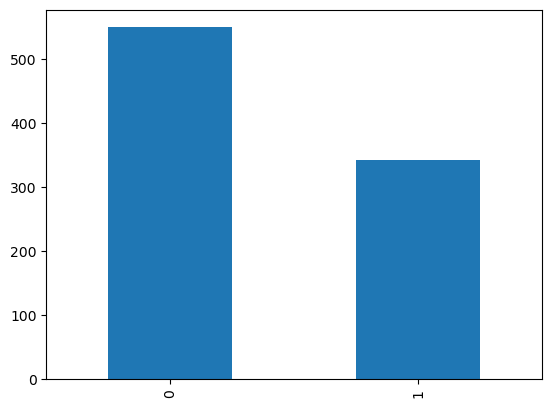

In [22]:
# Plot the histogram
data.Survived.value_counts().plot(kind='bar')

In [23]:
y = data["Survived"].values

<AxesSubplot:ylabel='Frequency'>

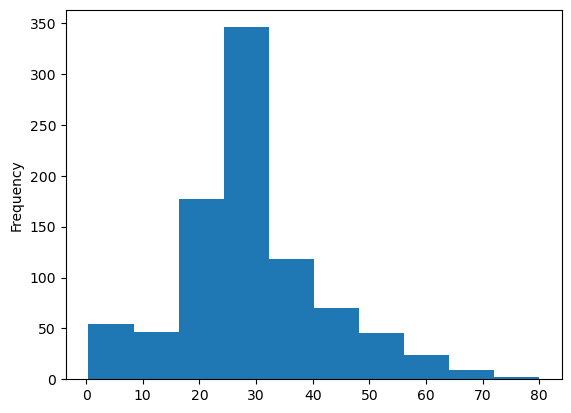

In [24]:
data['Age'].plot(kind='hist') # Histogram for age

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

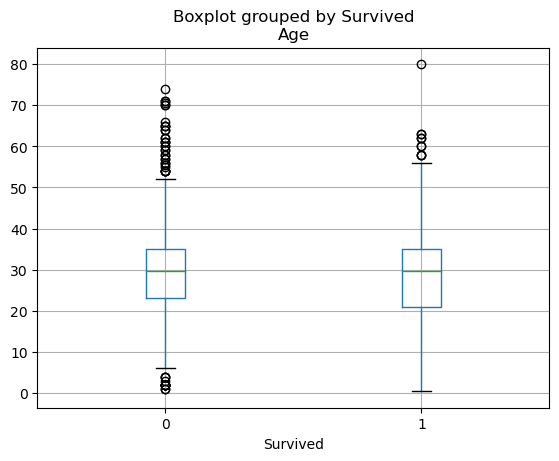

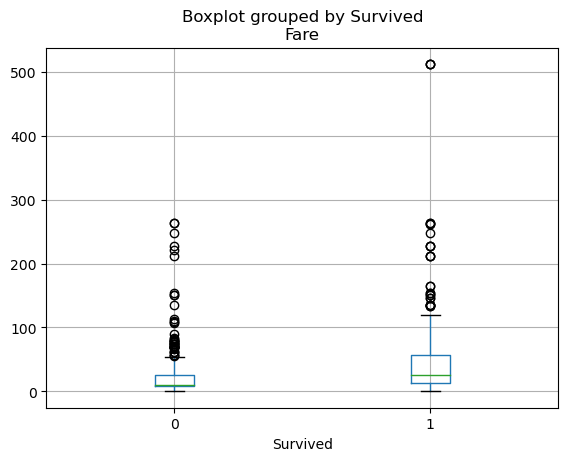

In [25]:
# Boxplots to compare the distribution of continuous variables by groups
data.boxplot(column='Age', by='Survived')
data.boxplot(column='Fare', by='Survived')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

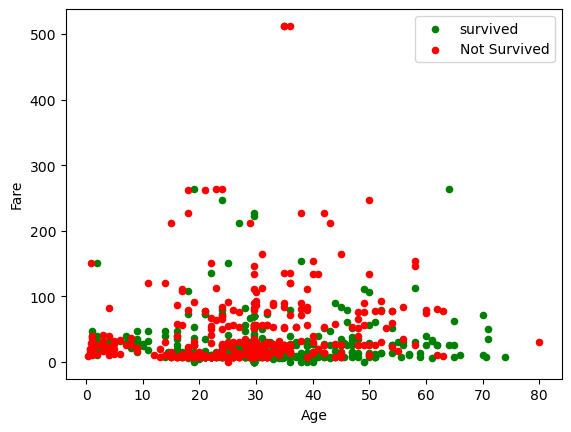

In [26]:
# Scatter plots
# Visualise the data by groups in colors
df0=data[data['Survived']==0] # subset of data
df1=data[data['Survived']==1] # subset of data
ax = df0.plot(kind='scatter', x='Age', y='Fare', color='green', label='survived')
df1.plot(kind='scatter', x='Age', y='Fare', color='red', label='Not Survived', ax=ax)

Exercise:

What are the other variables that you would like to visualise in order to understand the association between those variables and survival data? 

<AxesSubplot:title={'center':'Sex_male'}, xlabel='Survived'>

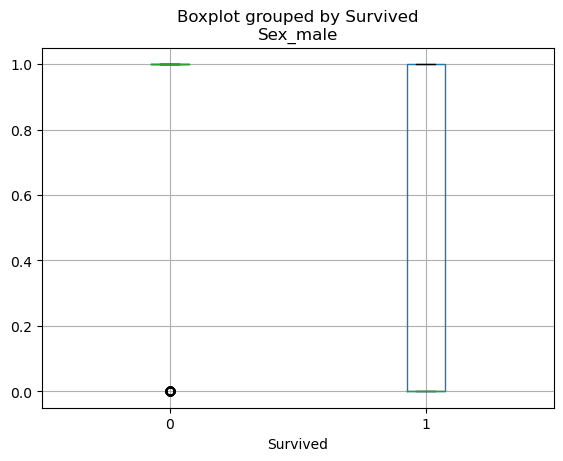

In [33]:
# Your answer or code here

males = data["Sex_male"] == 1 
females = data["Sex_female"] == 1
data.boxplot(column="Sex_male", by="Survived")

Now using the code above, analyse the column definitions and determine what features you would like to use for predicting if a person would survive or not.

In [28]:
X = data.values[:,1:] # remember to exclude the output column (the first column here)
print(X.shape)

(891, 12)


Now we can check to see whether or not this data has been set up correctly by ensuring that there are a equal amount of samples in both ```X``` and ```y```. If this throws and exception, alter your code to make it work. If you are still stuck, call over a demonstrator to help.

In [29]:
if X.shape[0] != y.shape[0]:
    raise Exception("Sample counts do not align! Try again!")

## Colab Specific

You can mount your Google Drive as a VM local drive. You can save your notebooks in your Drive, or directly to your GitHub repositories, or simply download them locally.

For more instruction, see https://colab.research.google.com/notebooks/io.ipynb

In [34]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!ls /content/drive/

You can access to your Drive files using this path (and try click on the link) "/content/drive/MyDrive/"

## Helpers

### Pandas Cheatsheet
https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

### List slicing tips

If you're new to the python programming language, understanding list slicing may be a bit difficult. Here's a quick guide.

Given the following list:

In [ ]:
l = ["This", "is", "a", "list", "of", "strings"]

If I wanted to get the first element of that list, I'd simply:

In [ ]:
l[0]

If I wanted to get the last element of that list, I'd simply:

In [ ]:
l[-1]

If I wanted to get everything after the first element:

In [ ]:
l[1:]

And if I wanted to get everything before the last element:

In [ ]:
l[:-1]

And finally, everything after the first and before the last:

In [ ]:
l[1:-1]